In [68]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import imageio
from copy import deepcopy

# Дано:
L = 0.1 # длина нити
N = 101 # количество узлов
l = L/(N-1) # длина каждого сегмента
F = 100 # сила действующая на центральный узел
E = 10 # модуль Юнга
rho = 10 # линейная плотность нити
m = rho * l # масса каждого узла
dt = 0.001 # шаг по времени
t = 2*80 # количество шагов времени
points = [{'x':i*l, 'y':10., 'vx':0., 'vy':0.} for i in range(0, N)]
centre_point = N/2

def get_distance(p1, p2):
    p0 = {'x': p1['x'] - p2['x'], 'y': p1['y'] - p2['y']}
    return ((p0['x'])**2 + (p0['y'])**2)**0.5, p0

def get_f_vec(F, l, p0):
    k = float(F) / l
    return {'x': k*p0['x'], 'y': k*p0['y']}

def sum_vec(*vecs):
    rez = {'x': 0, 'y': 0}
    for vec in vecs:
        rez['x'] += vec['x']
        rez['y'] += vec['y']
    return rez

def get_a(F_vec, m):
    return {'x': F_vec['x'] / m, 'y': F_vec['y'] / m}

def change_v(index_of_point, a_vec):
    p = points[index_of_point]
    p['vx'] += a_vec['x'] * dt
    p['vy'] += a_vec['y'] * dt

def move_points():
    for i in range(N):
        p = points[i]
        p['x'] += p['vx'] * dt
        p['y'] += p['vy'] * dt

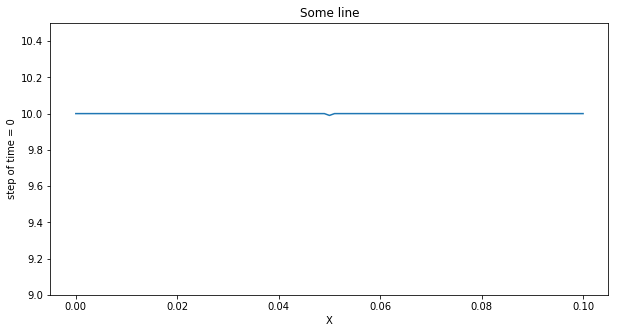

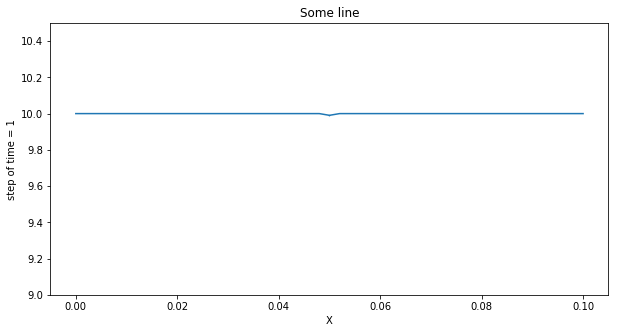

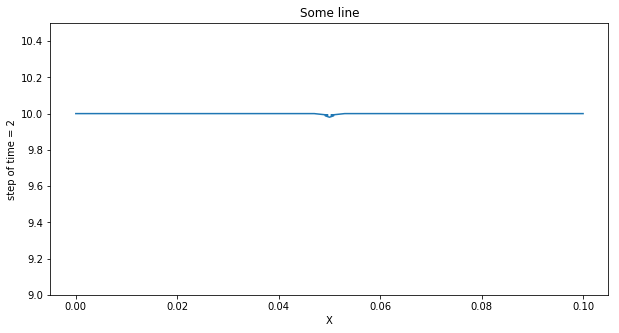

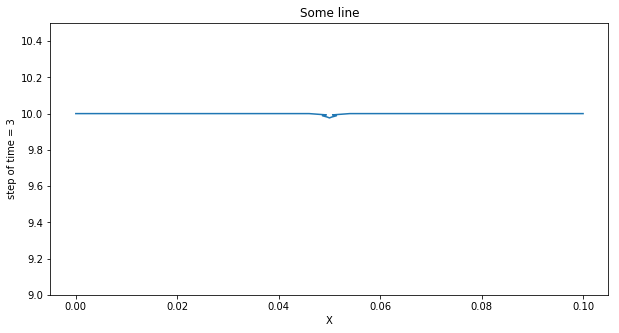

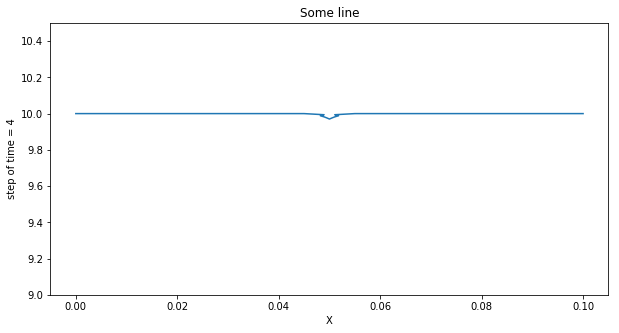

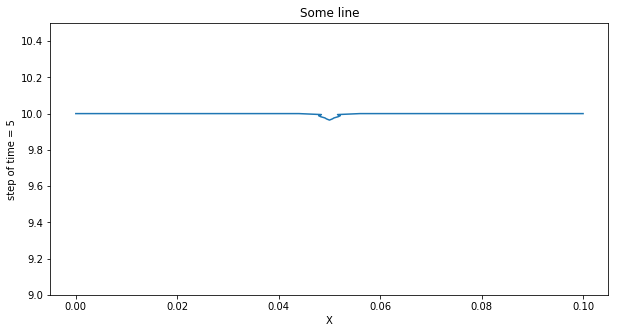

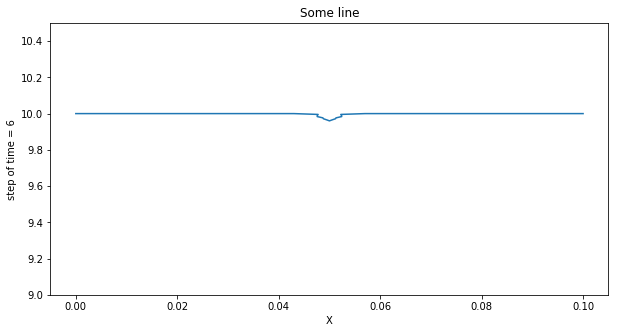

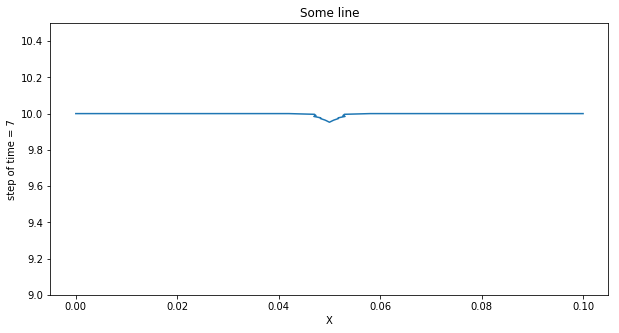

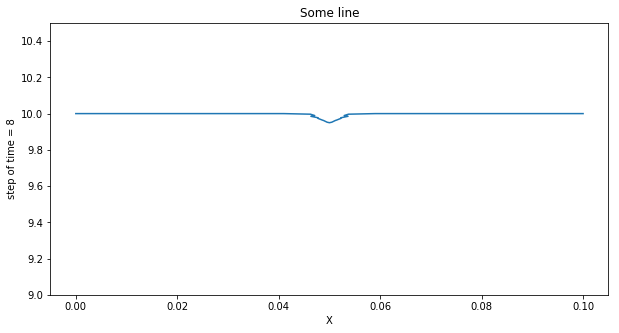

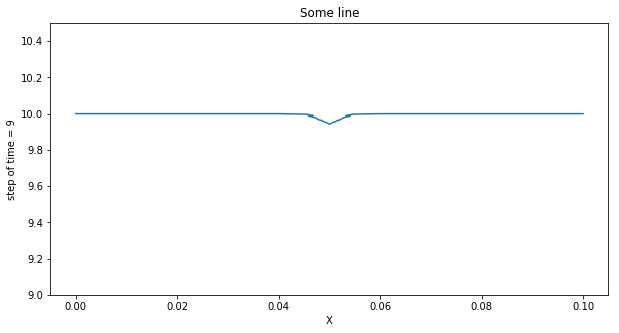

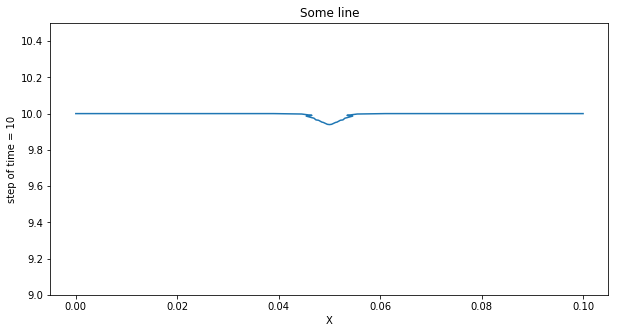

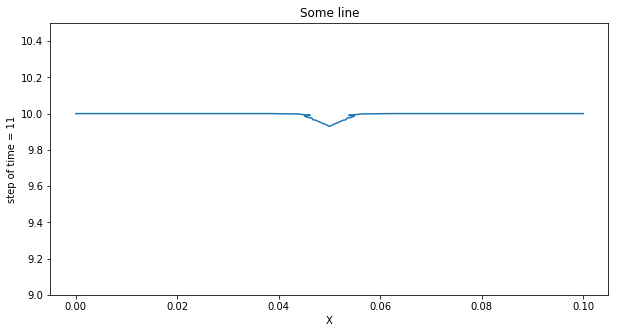

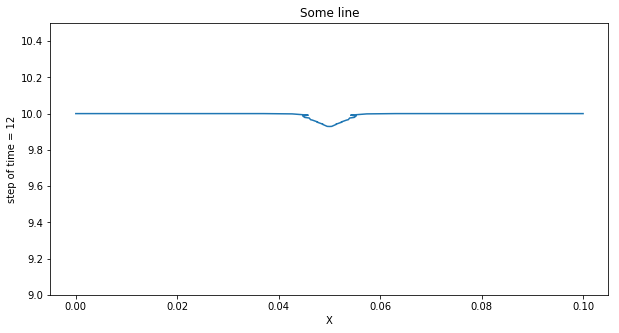

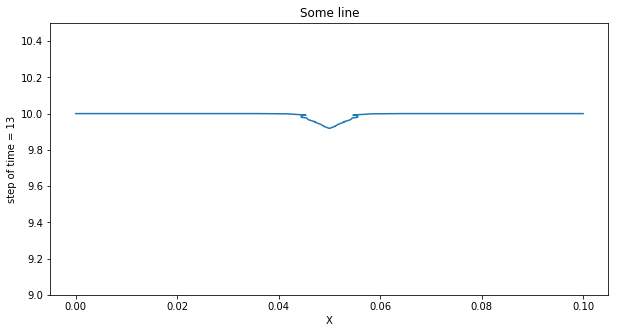

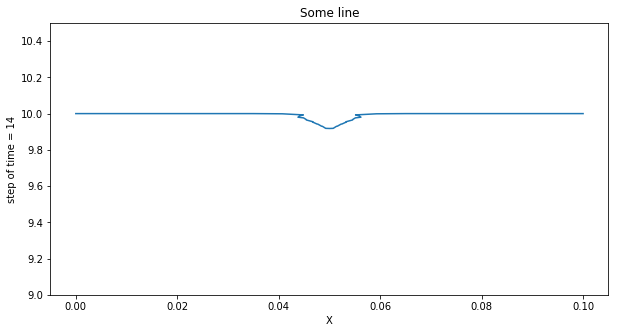

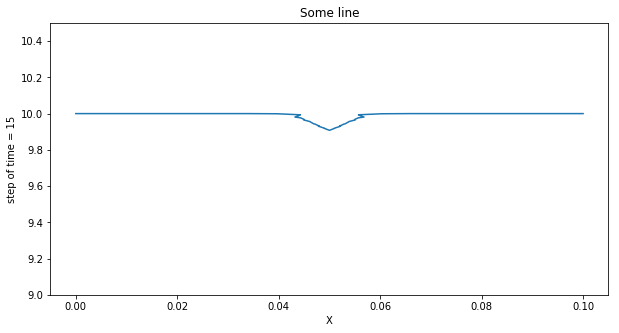

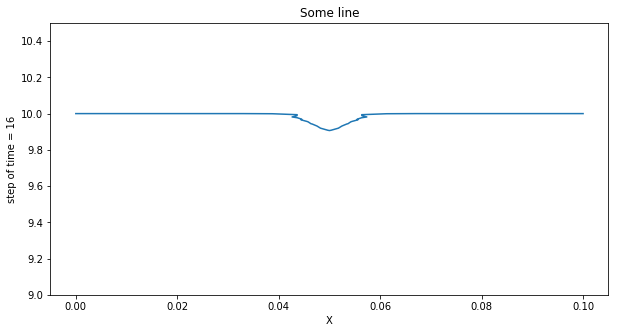

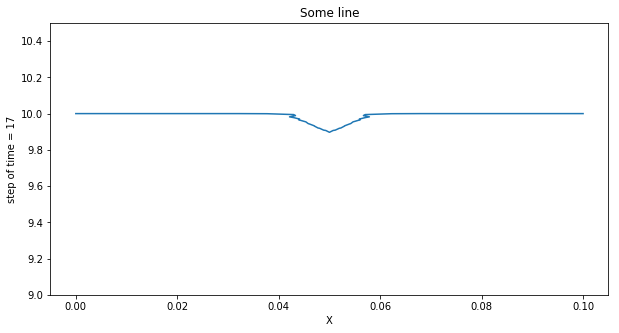

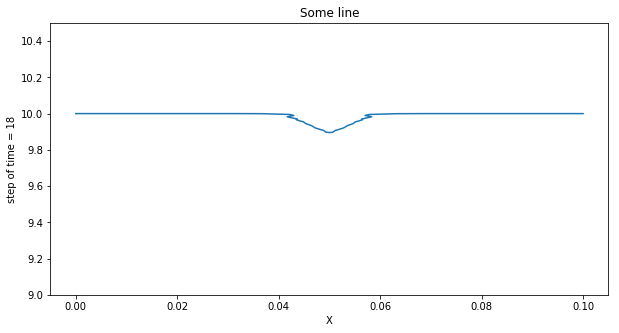

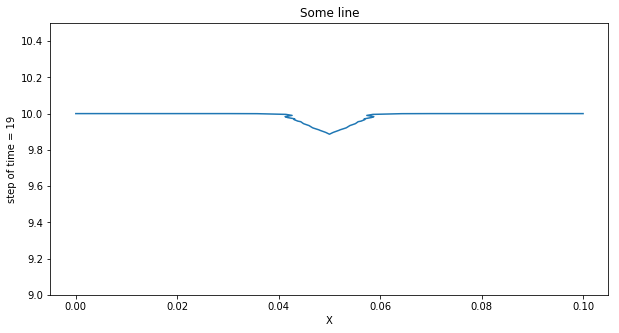

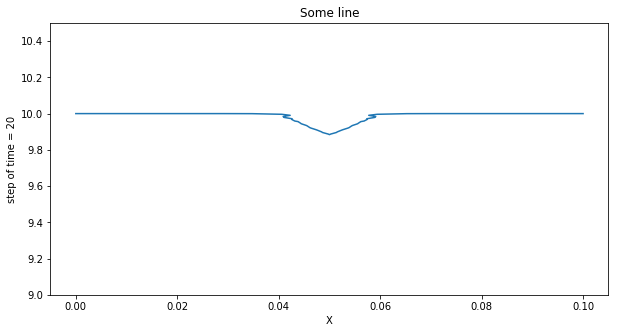

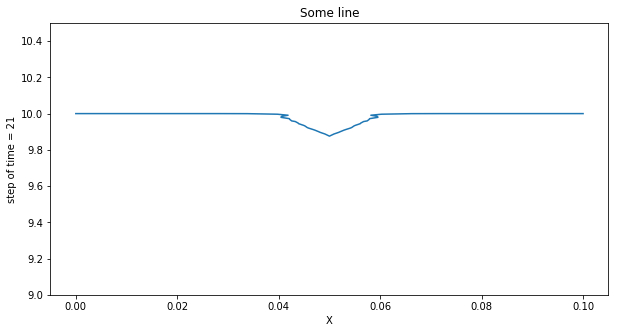

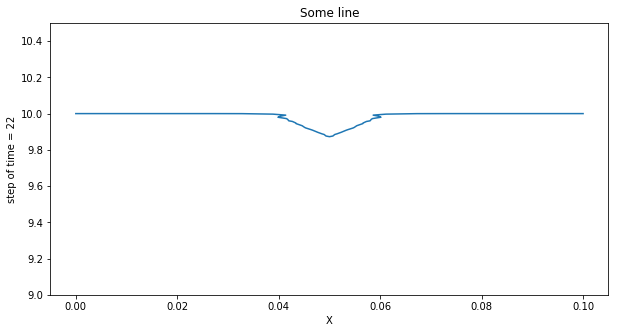

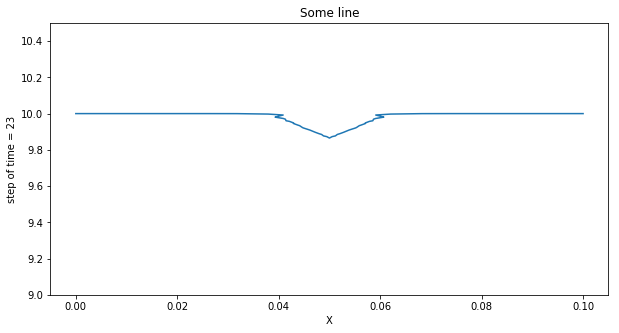

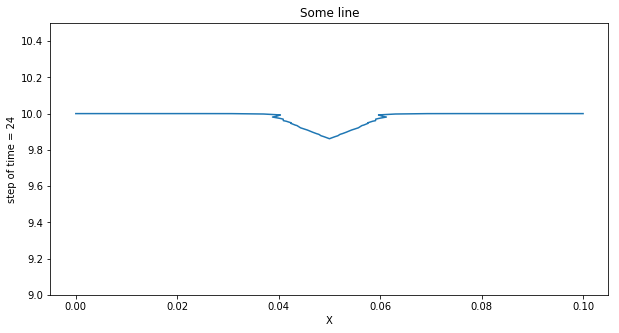

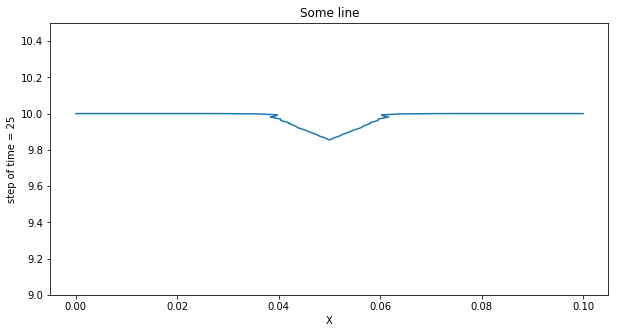

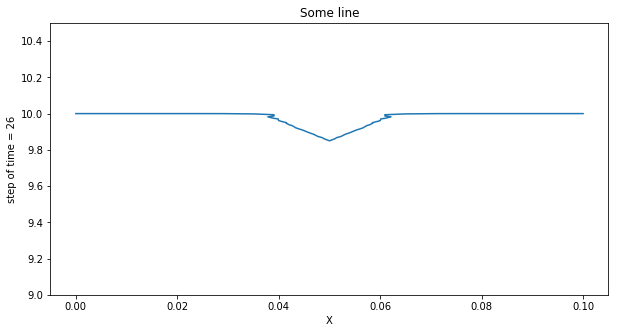

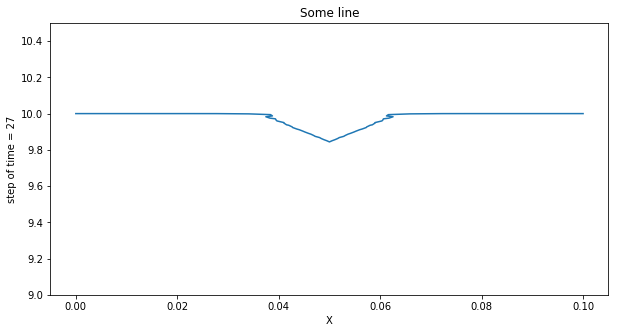

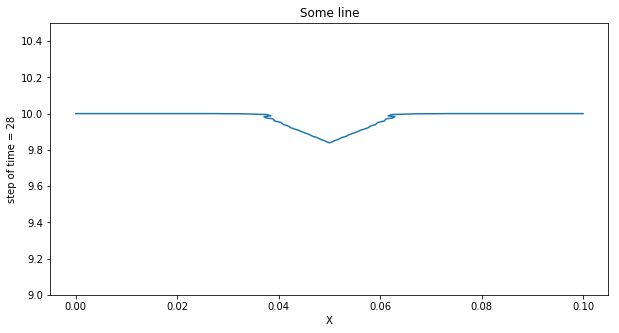

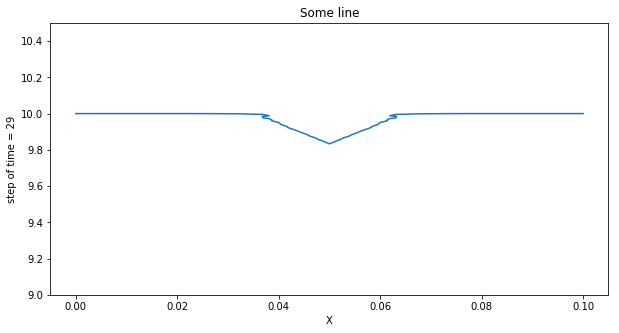

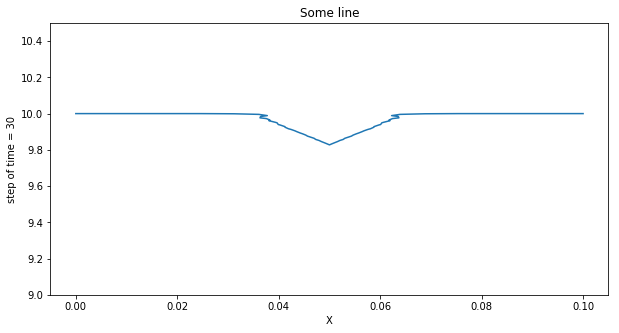

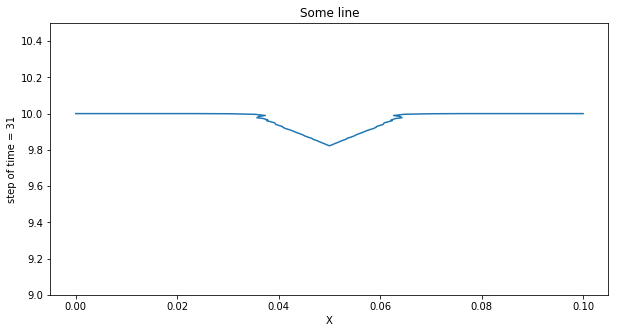

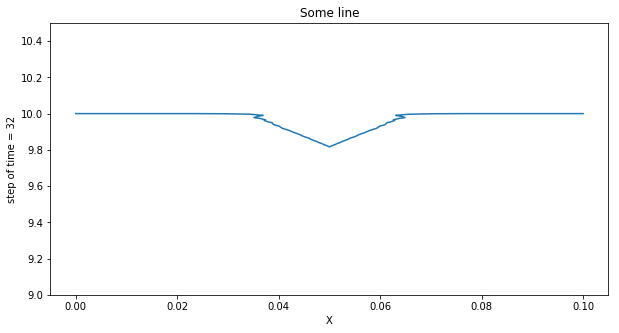

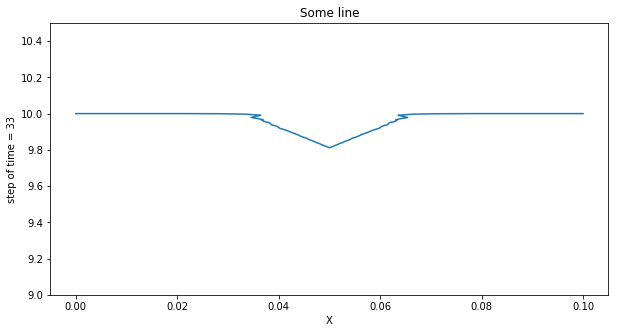

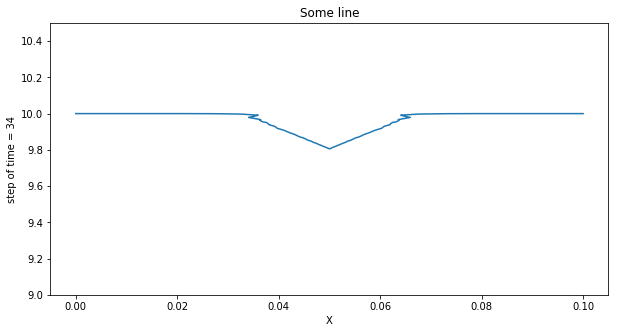

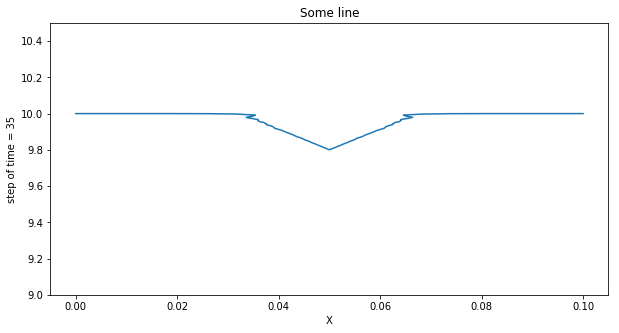

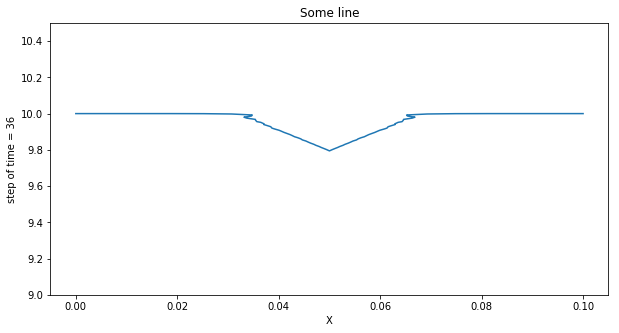

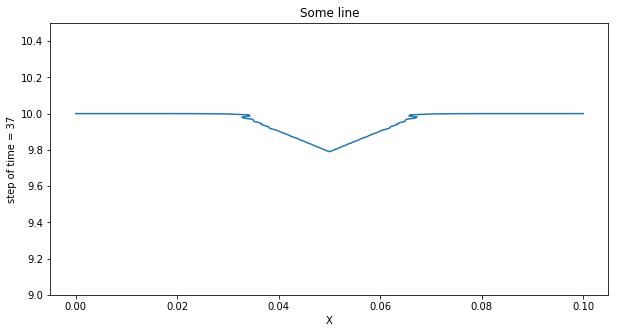

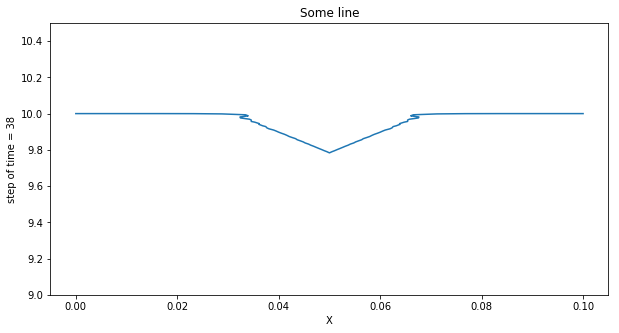

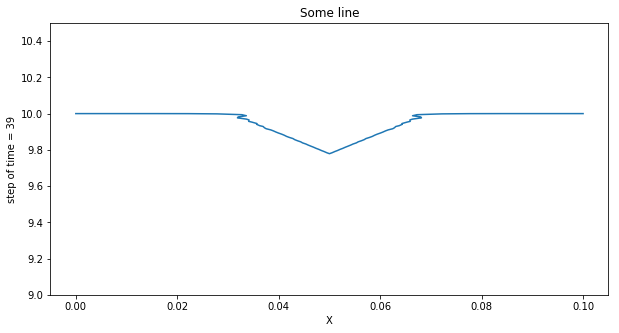

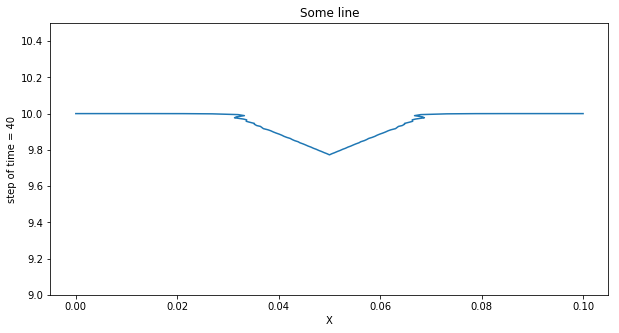

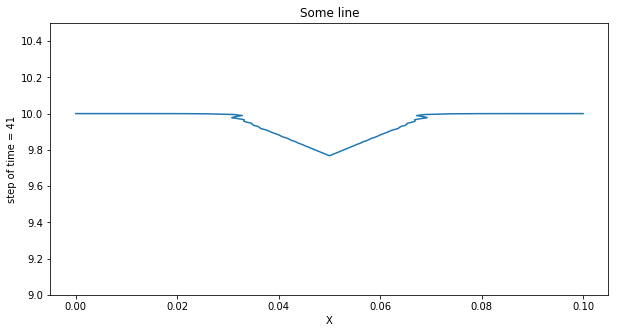

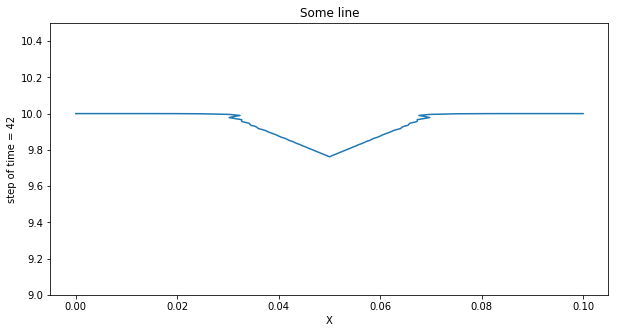

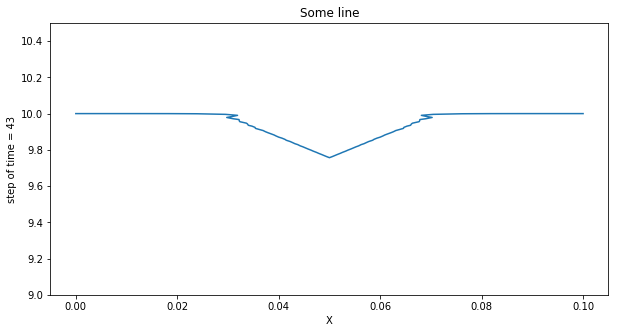

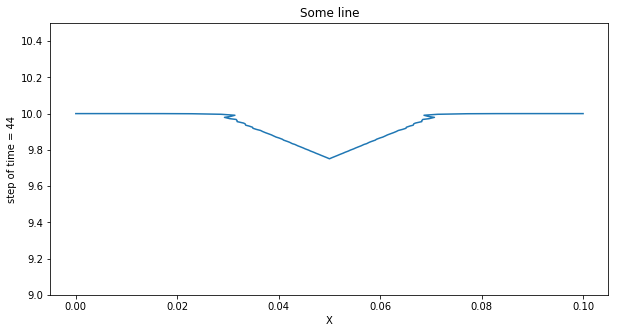

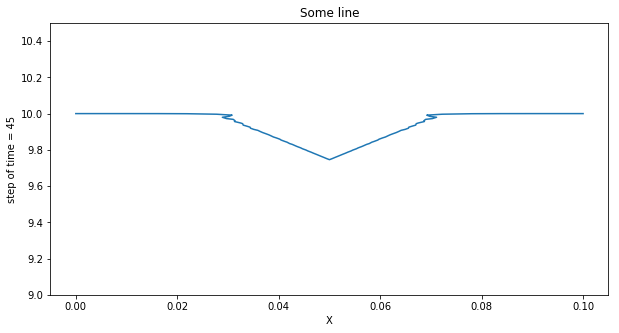

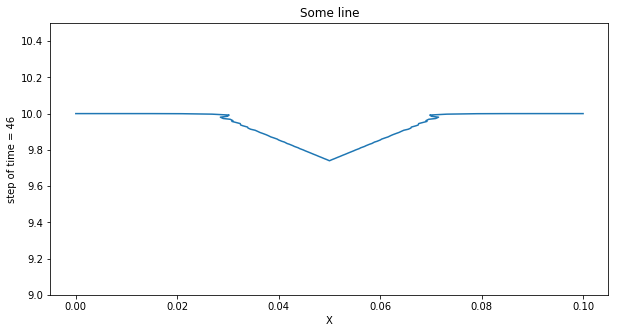

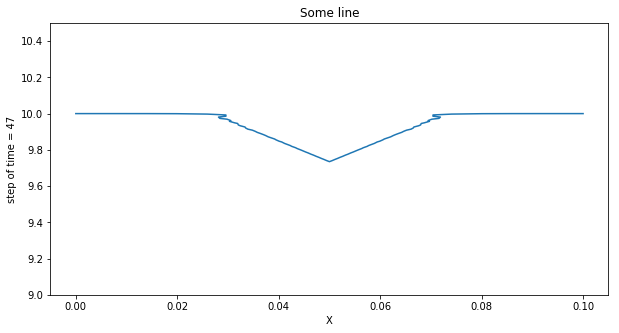

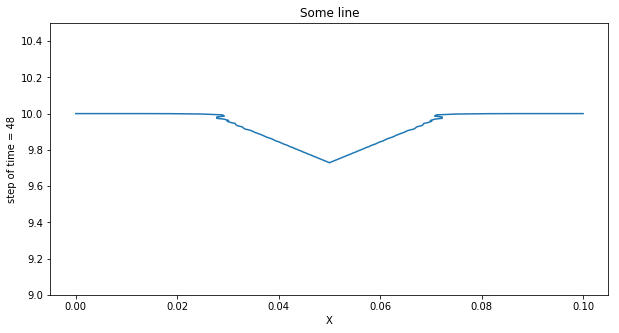

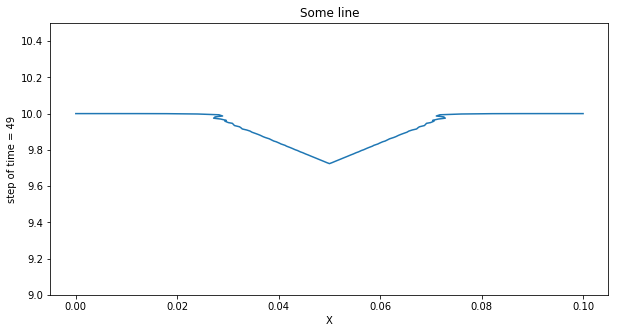

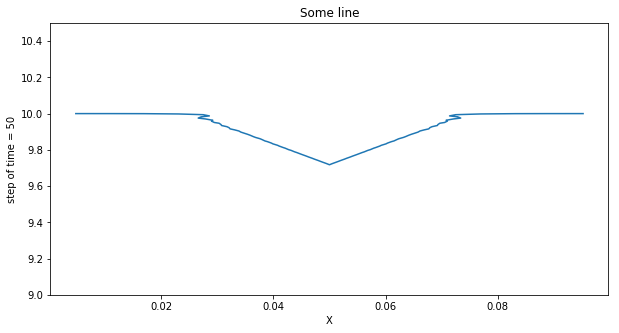

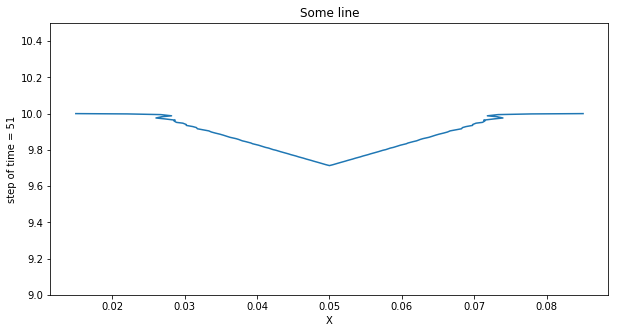

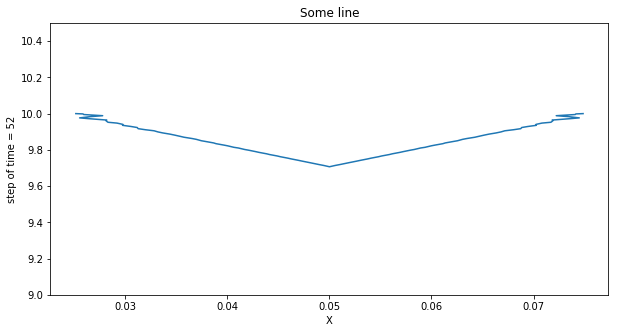

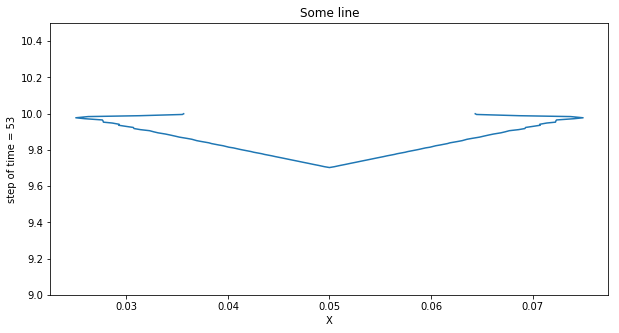

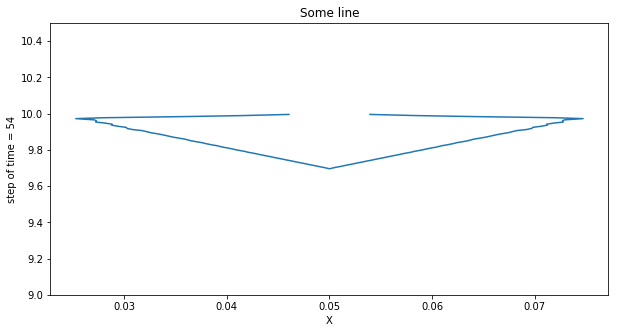

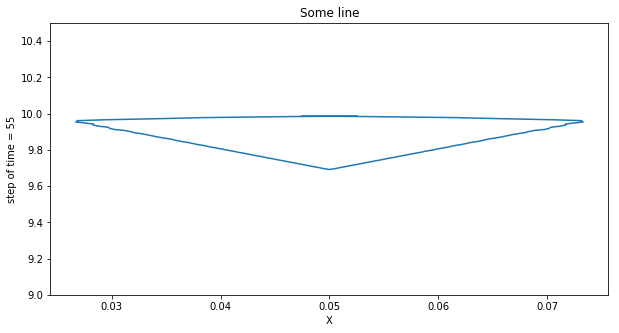

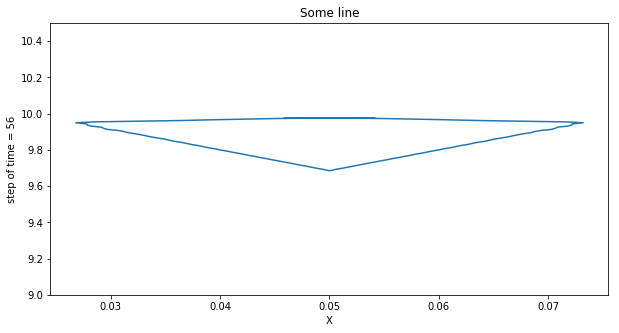

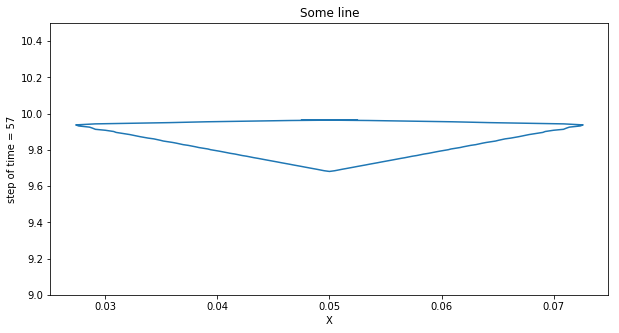

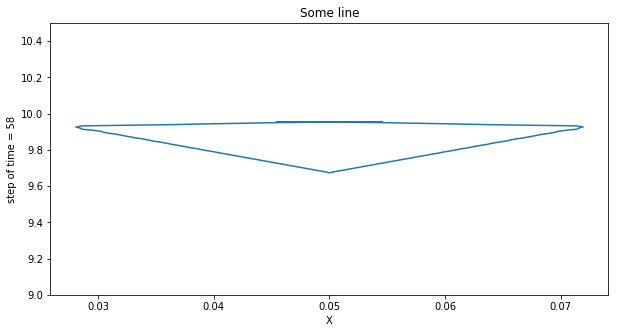

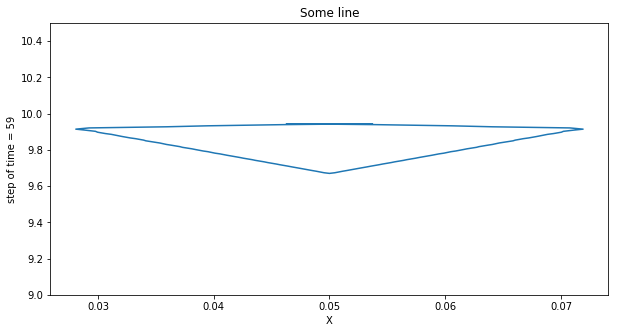

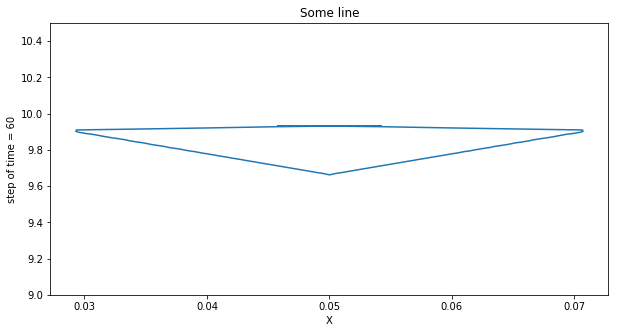

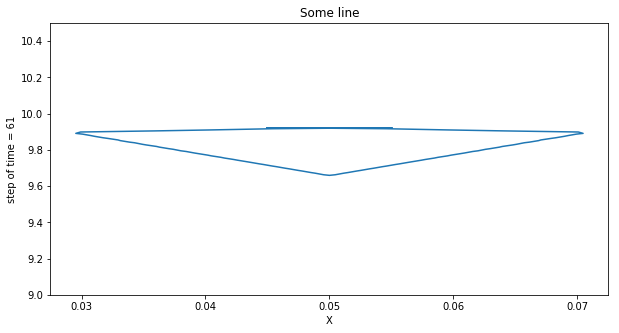

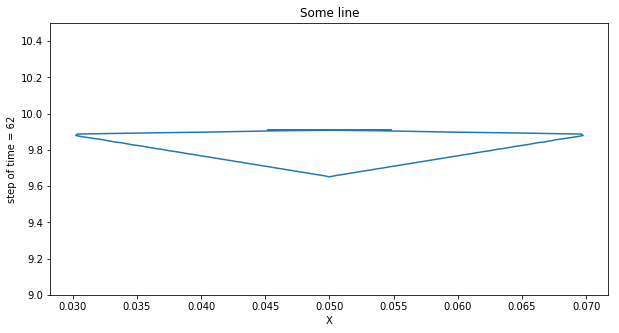

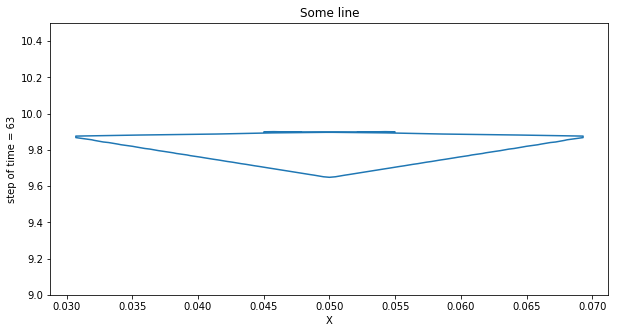

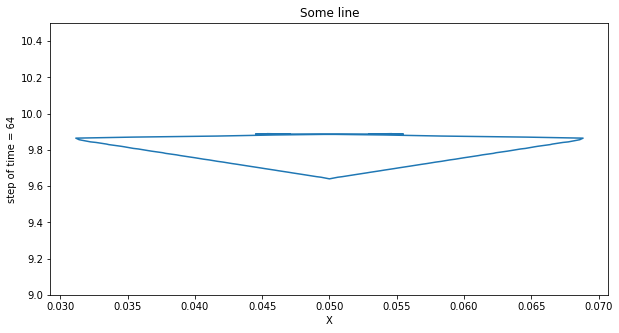

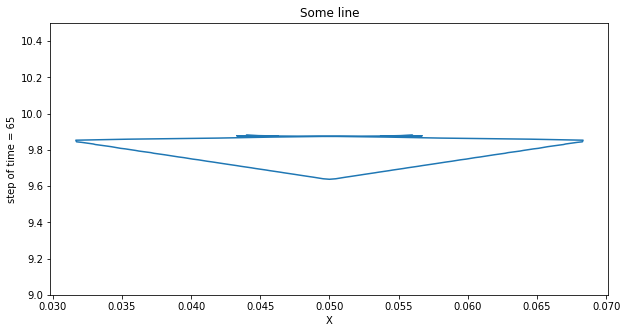

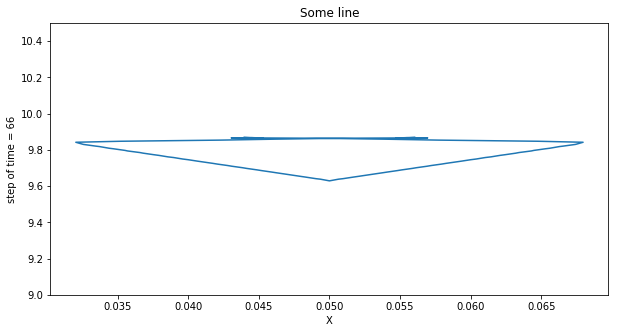

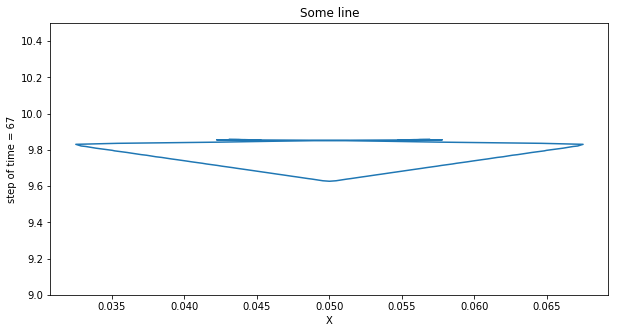

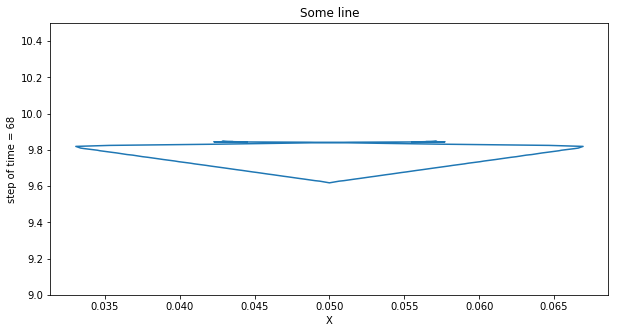

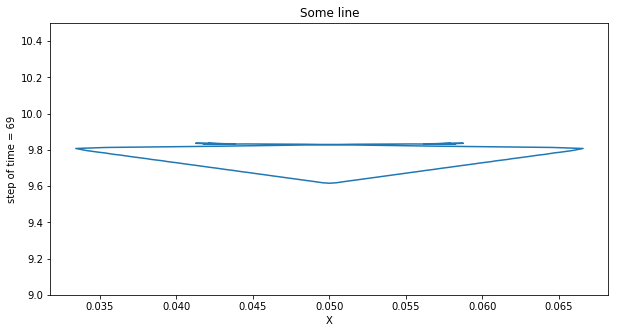

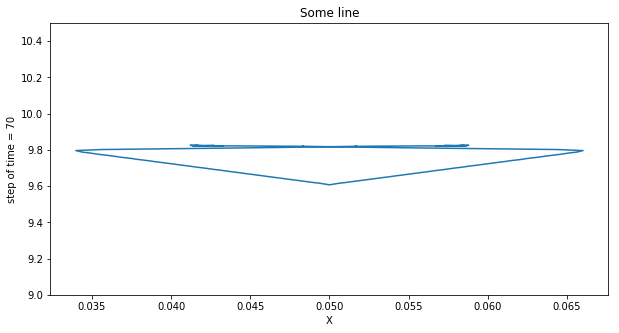

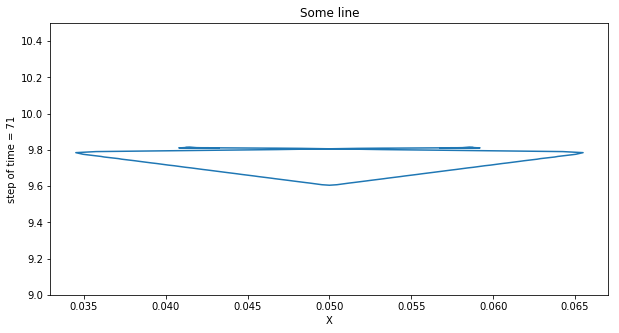

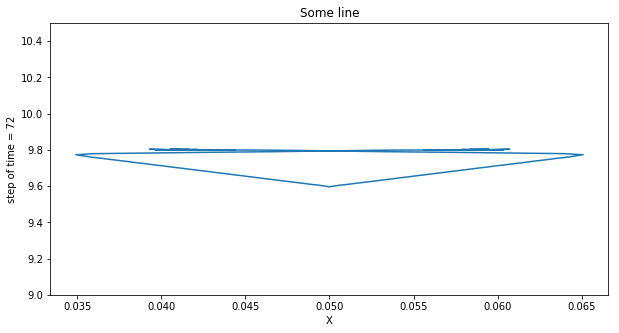

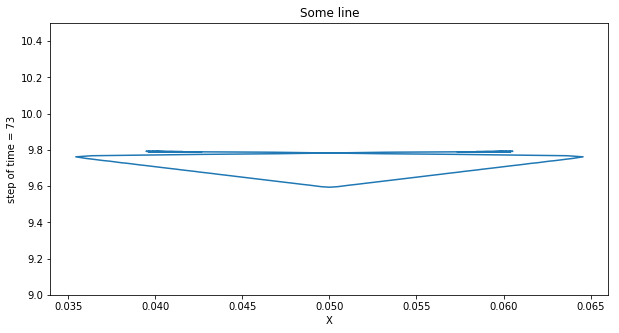

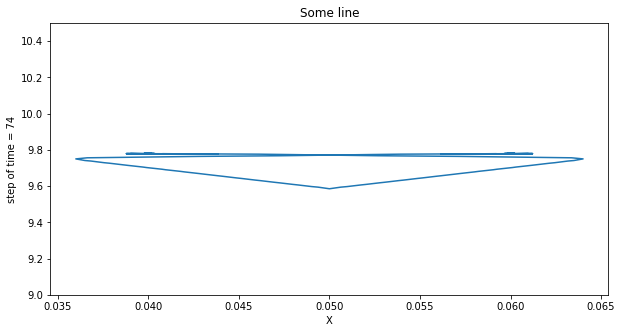

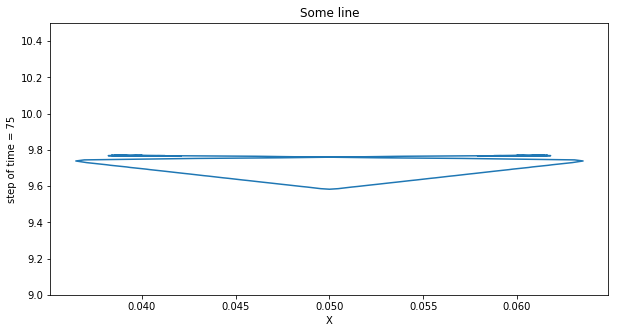

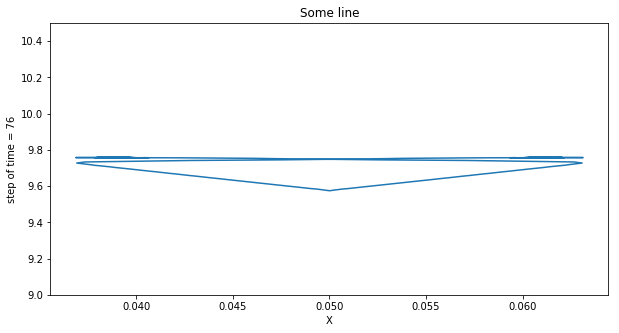

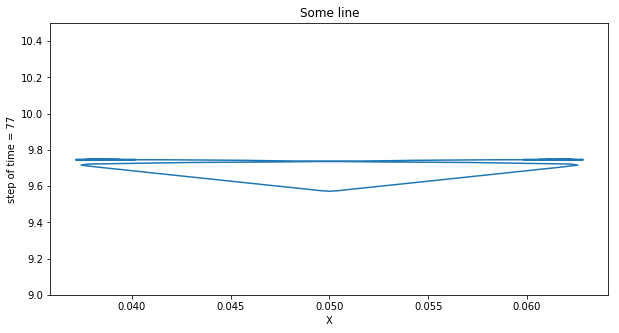

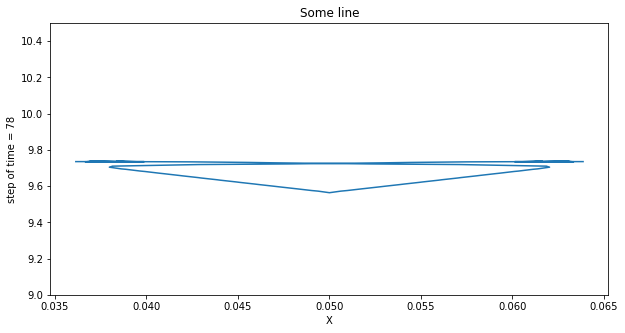

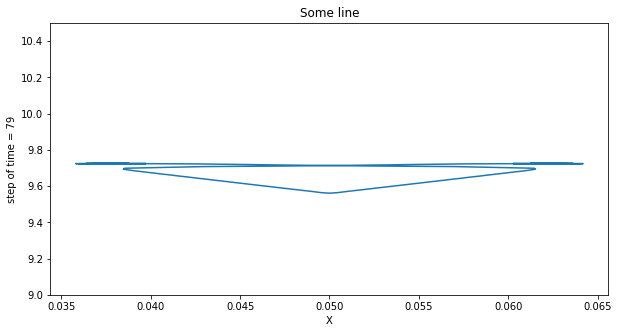

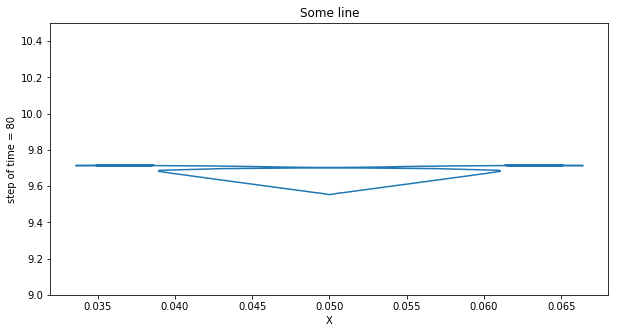

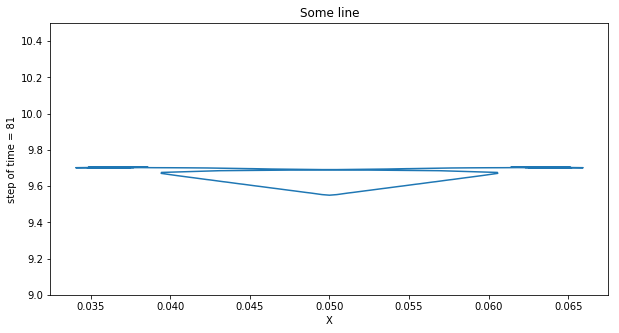

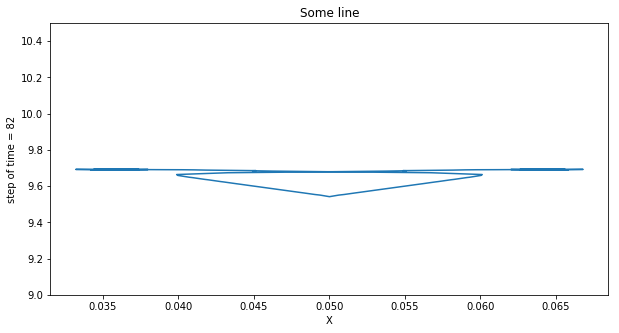

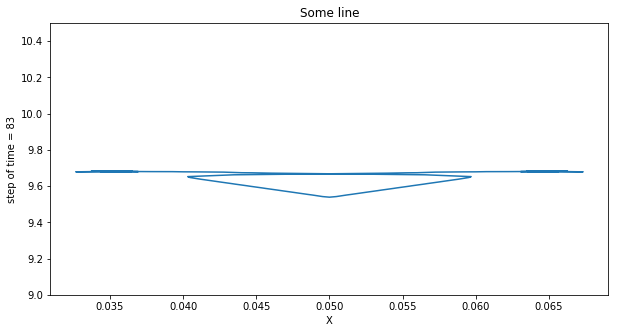

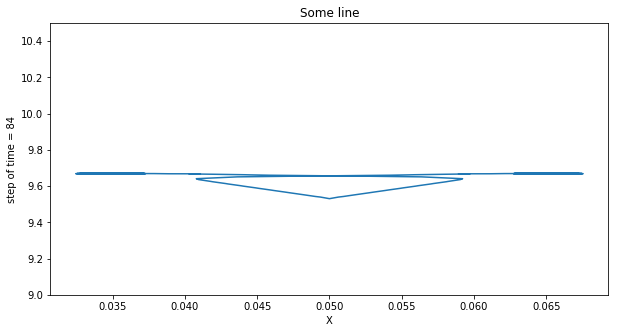

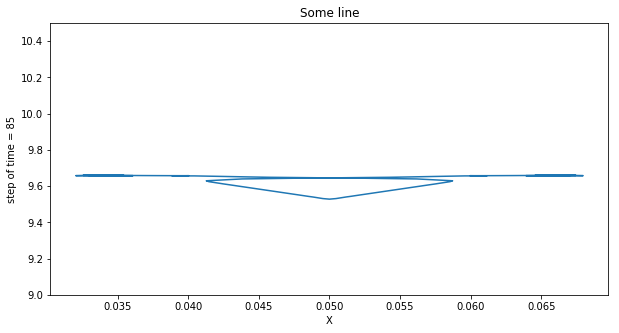

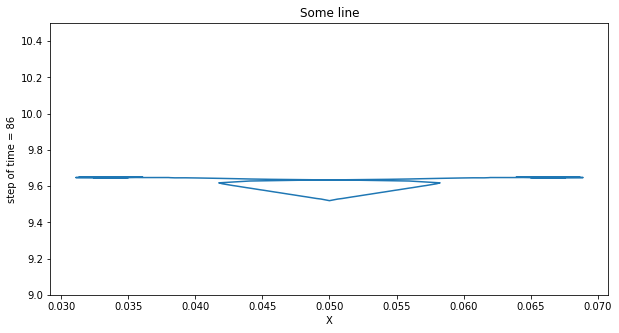

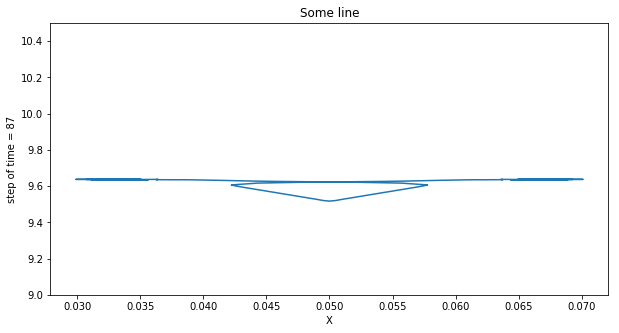

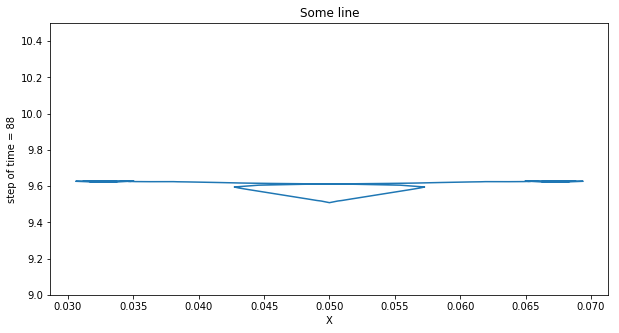

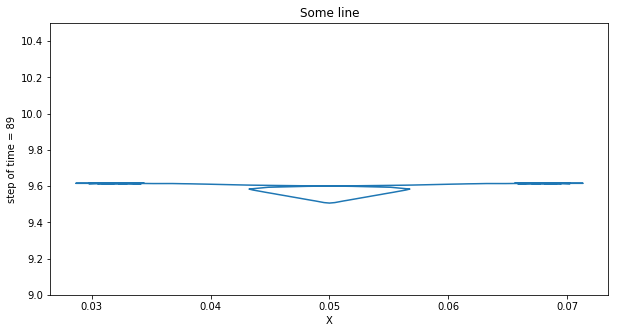

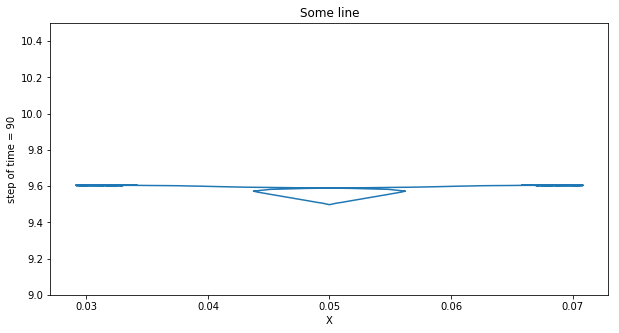

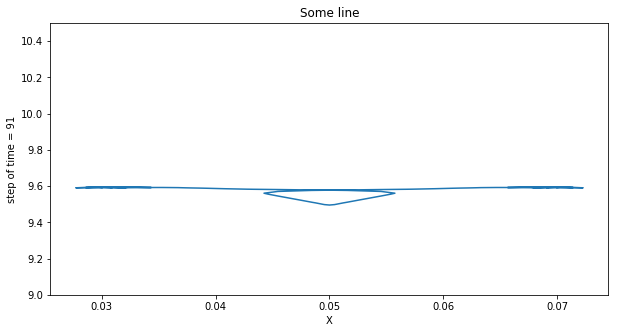

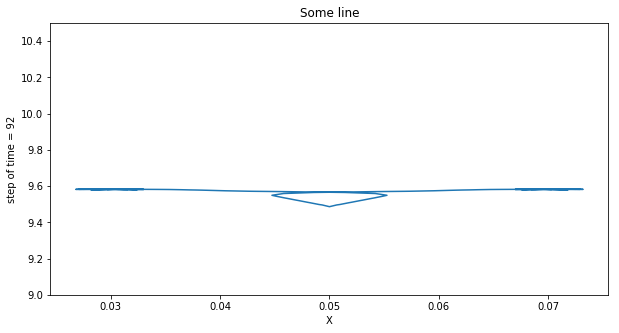

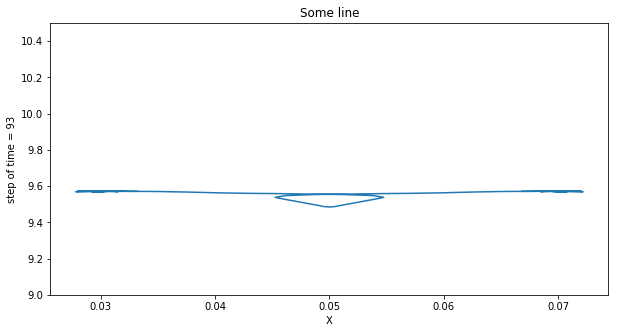

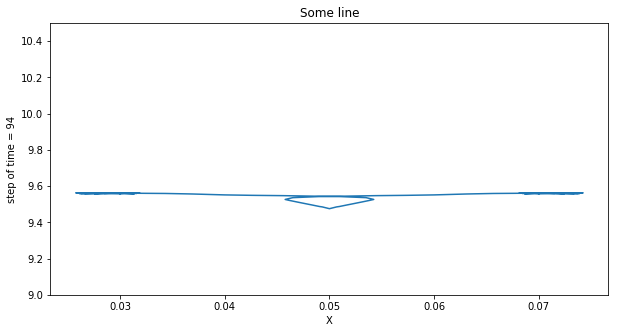

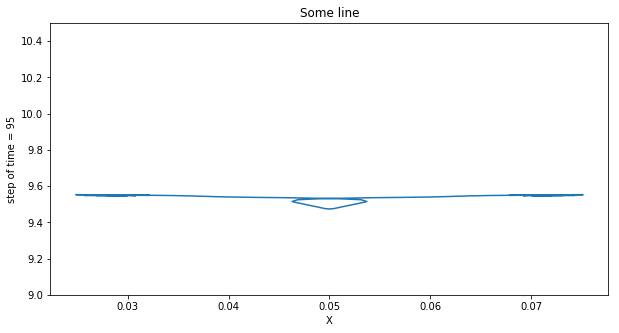

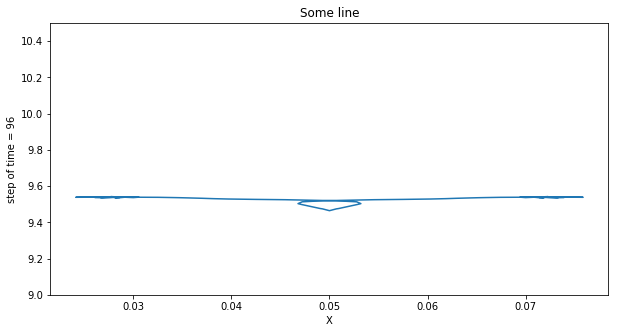

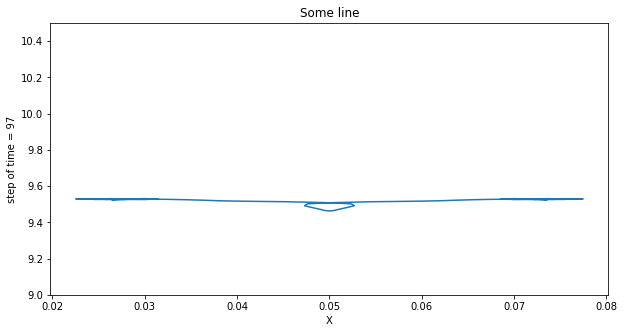

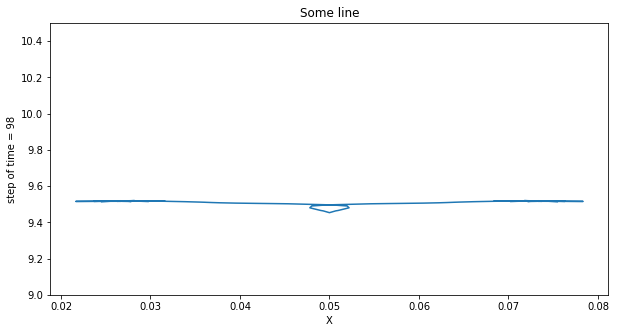

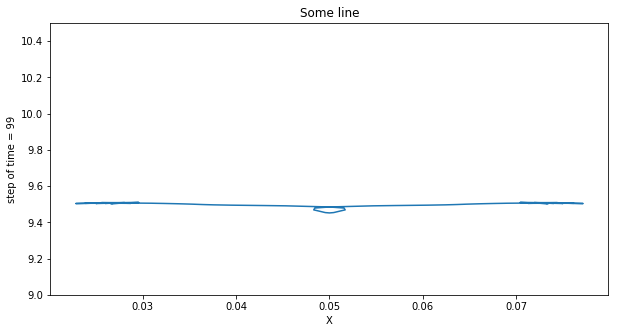

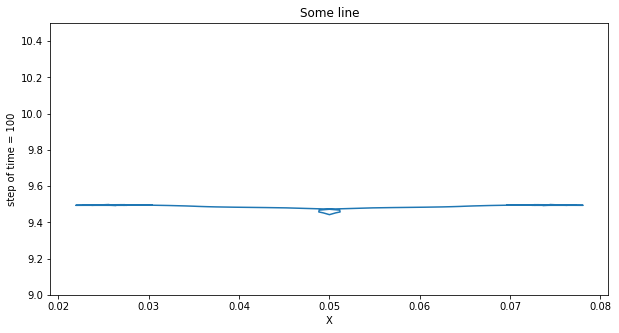

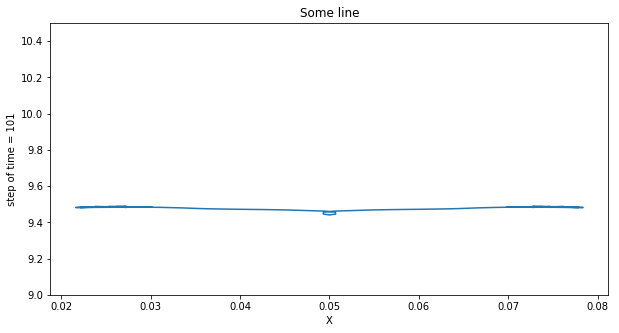

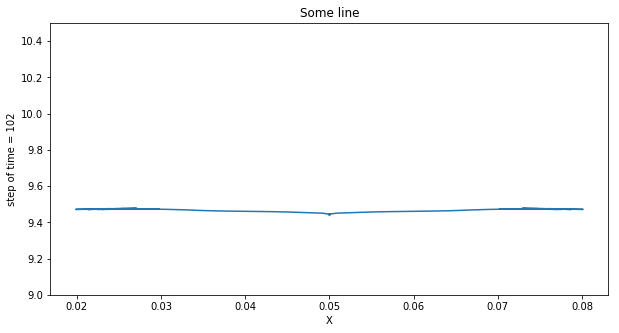

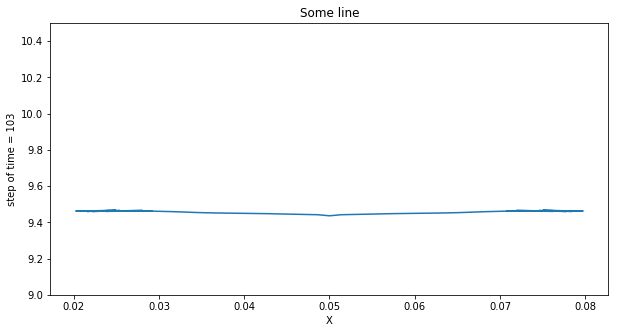

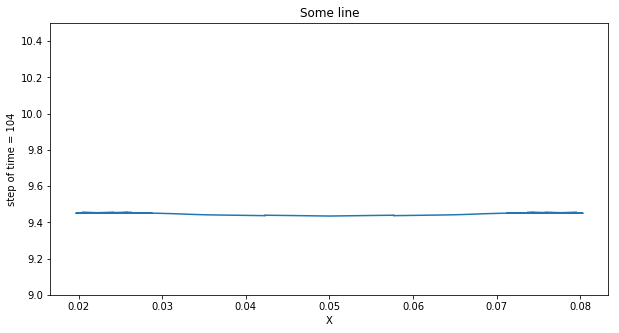

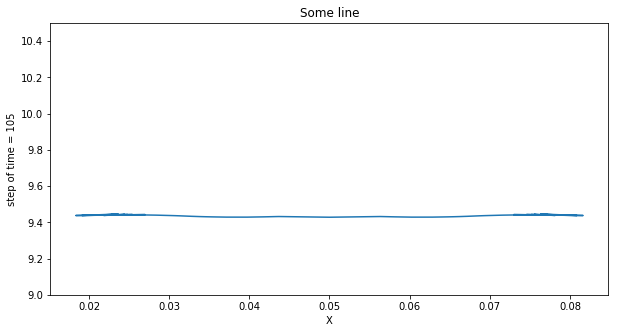

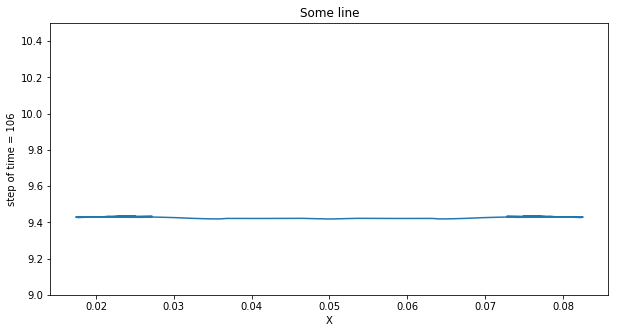

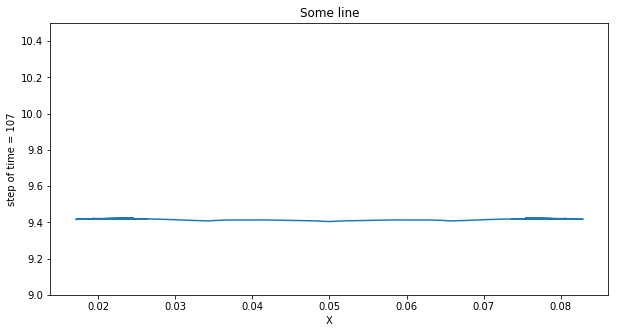

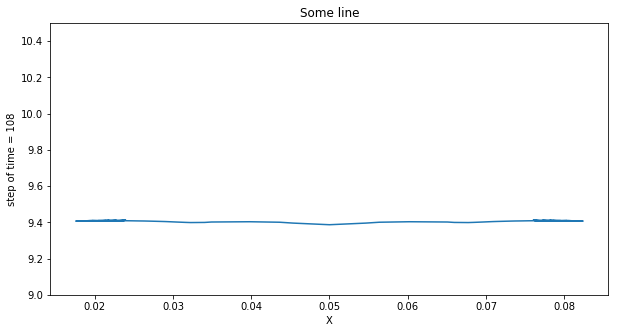

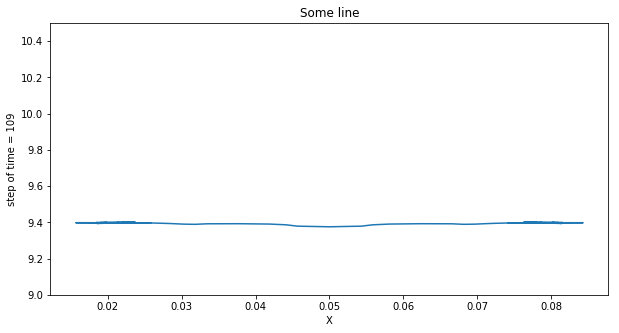

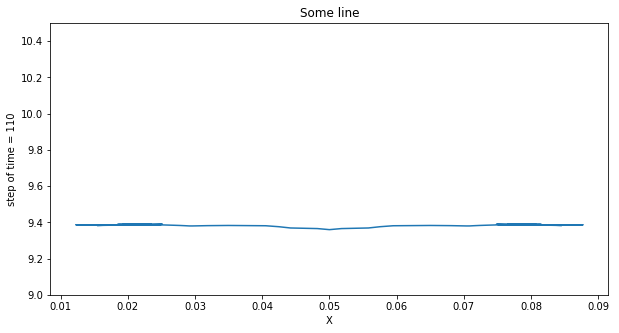

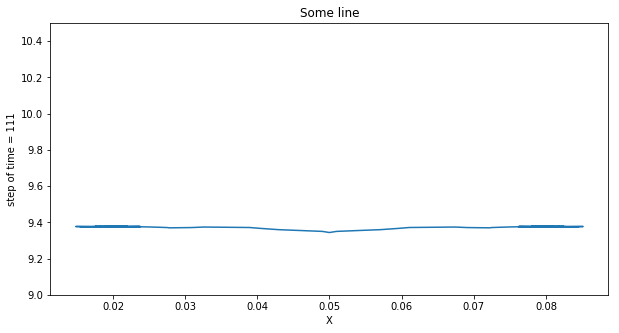

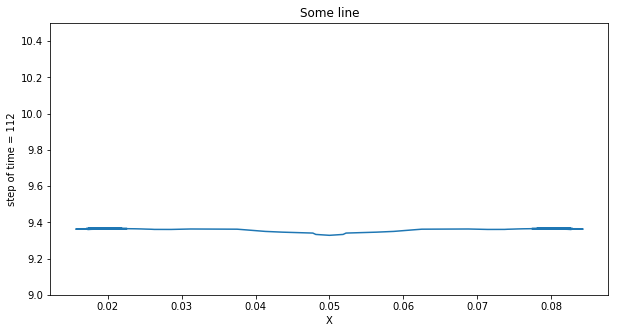

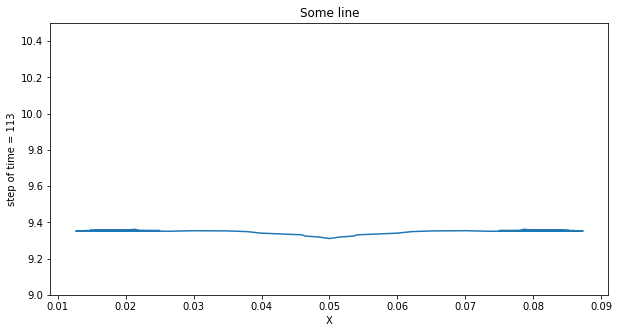

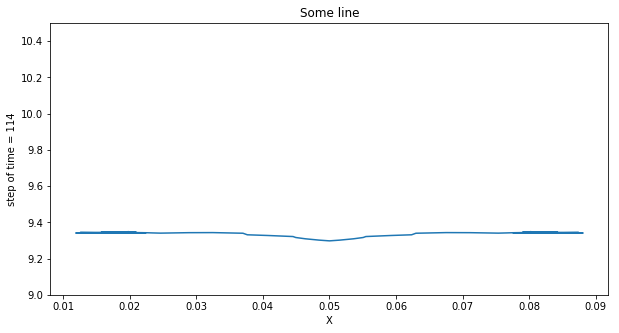

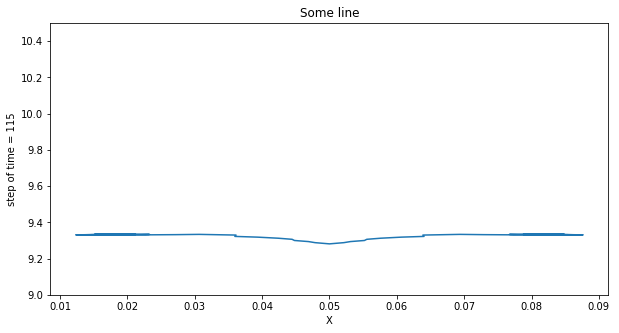

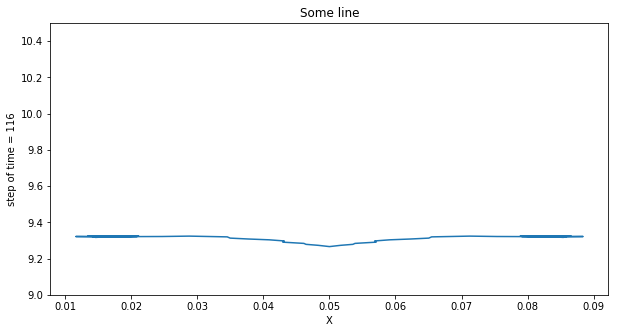

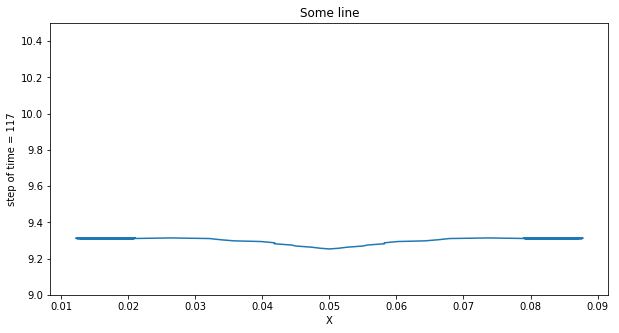

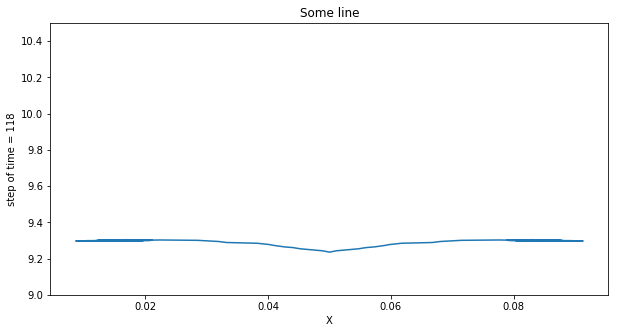

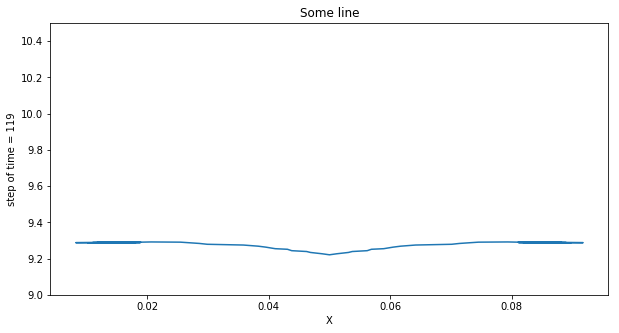

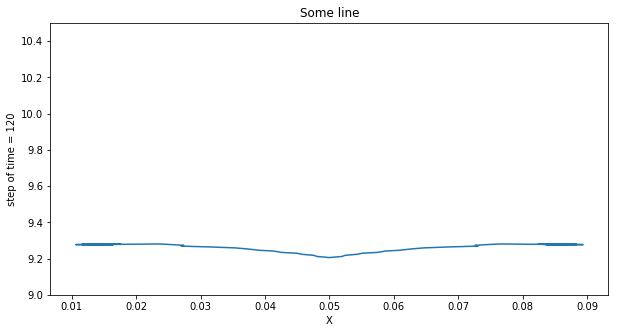

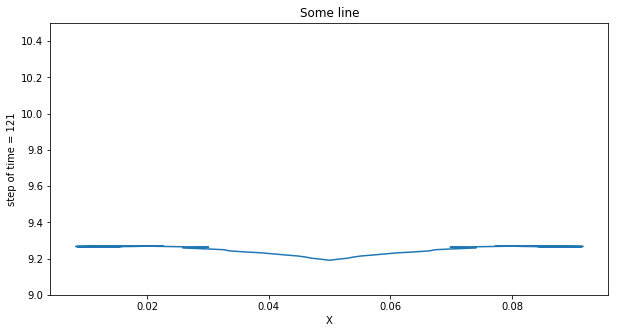

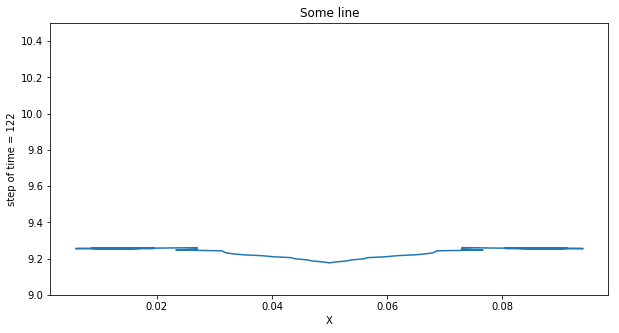

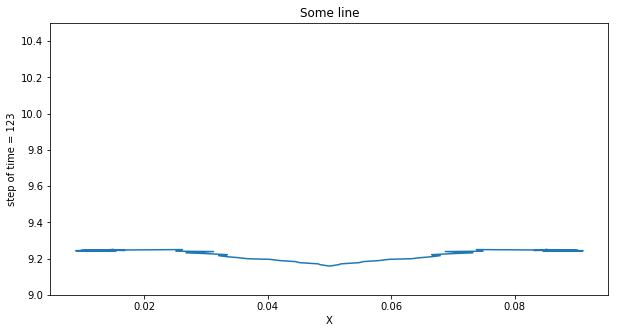

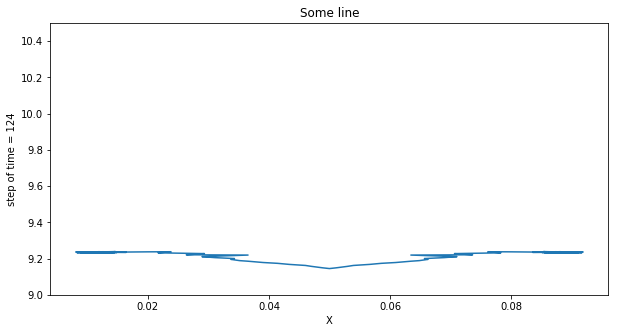

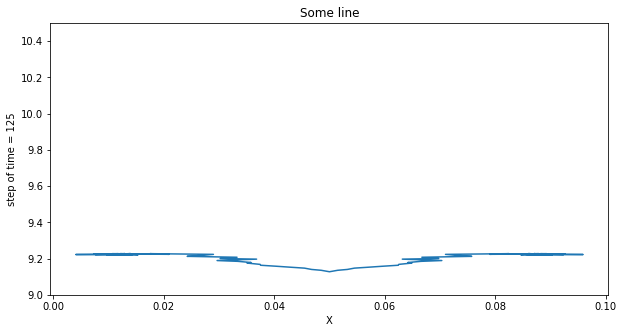

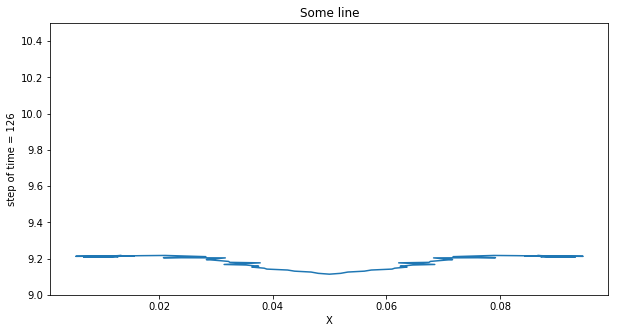

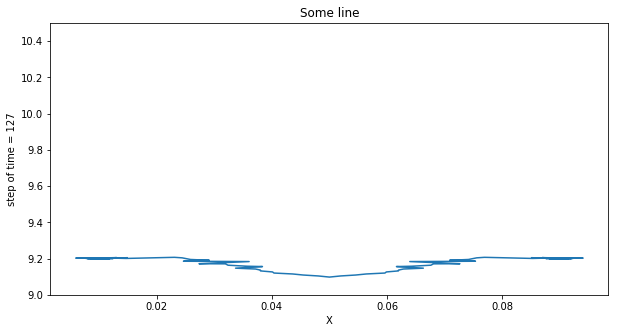

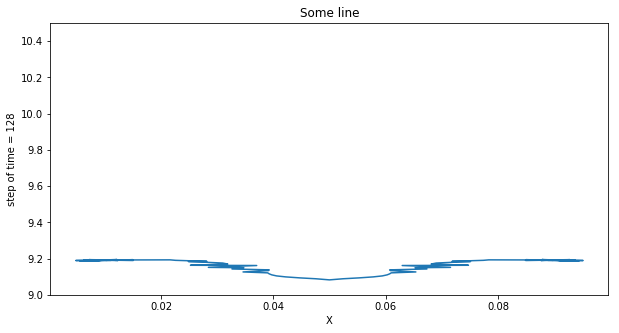

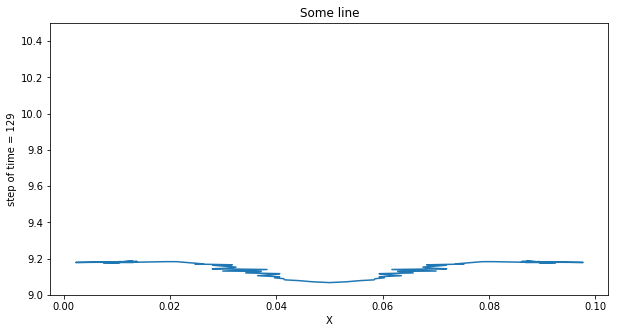

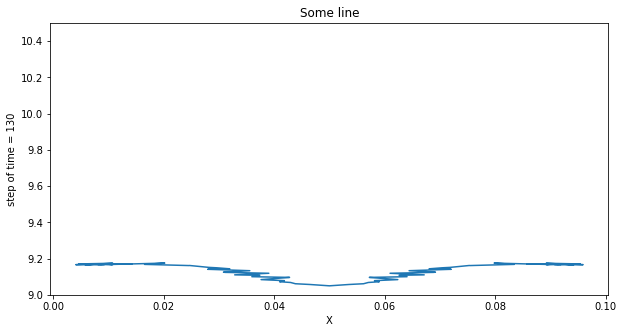

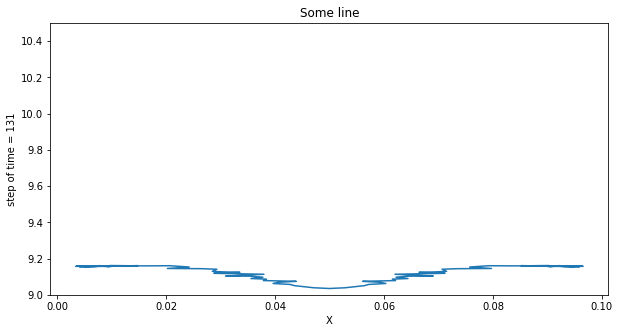

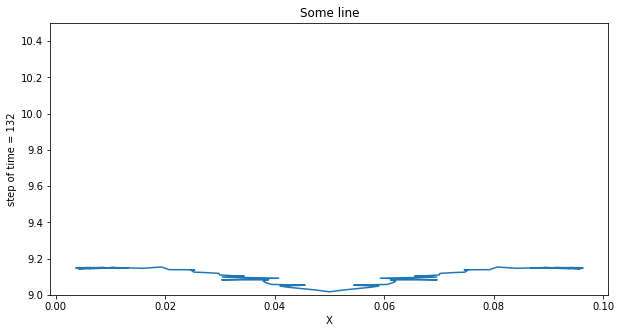

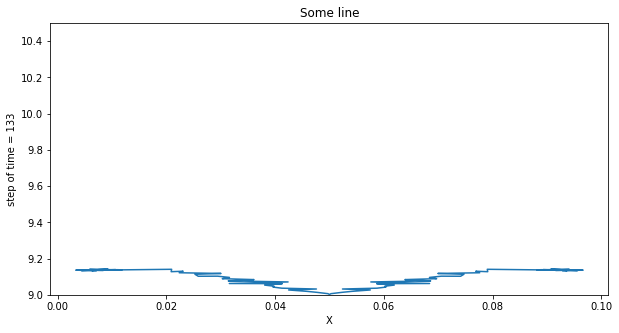

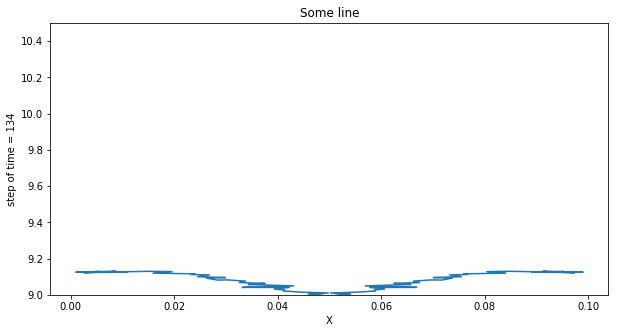

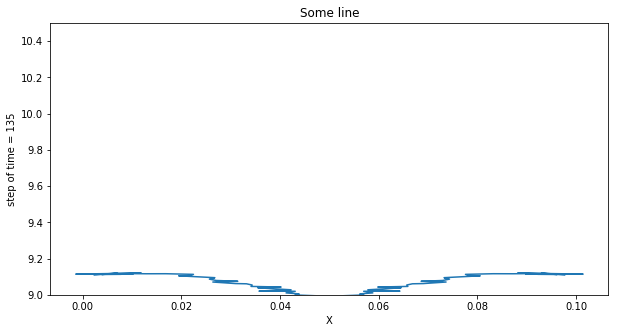

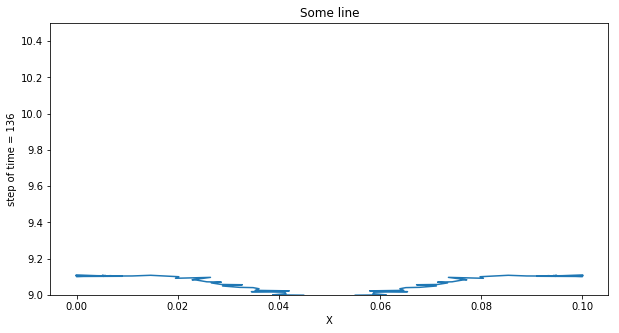

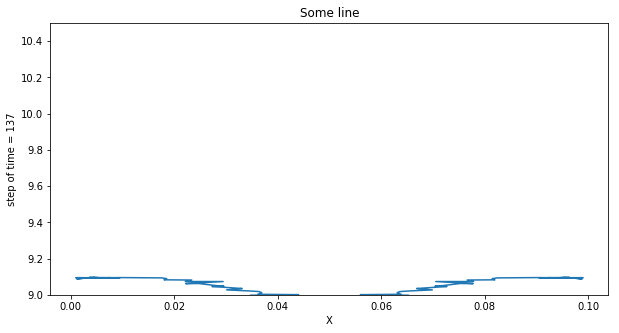

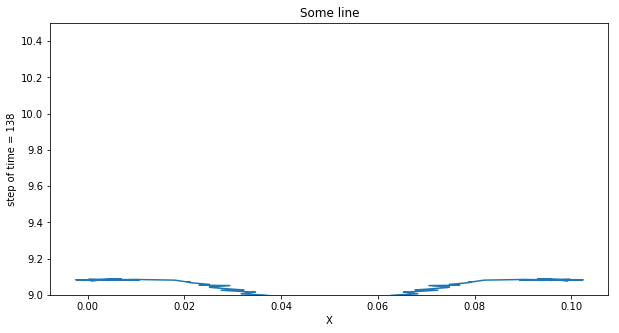

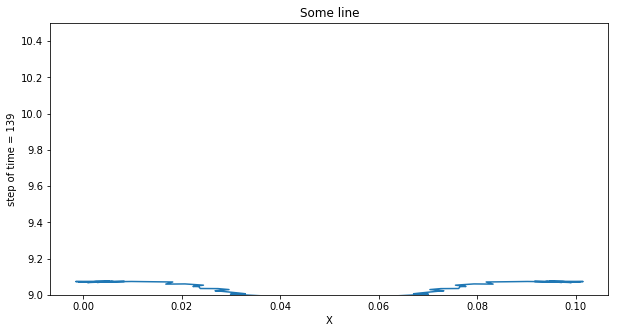

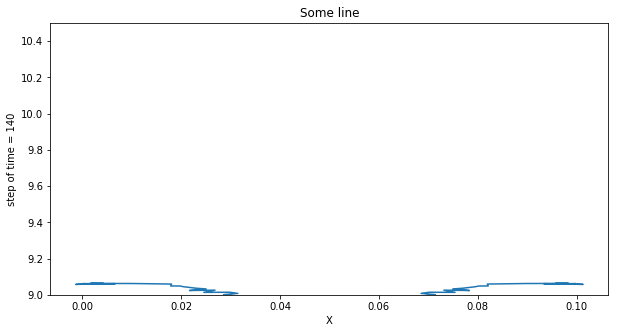

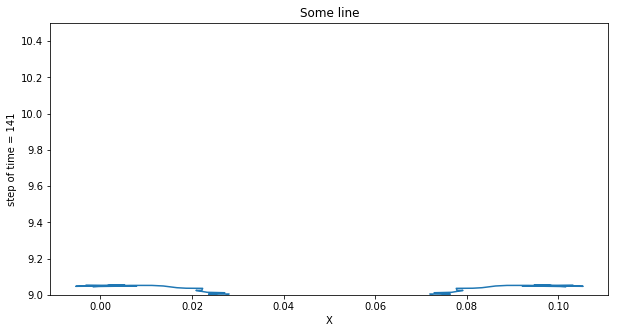

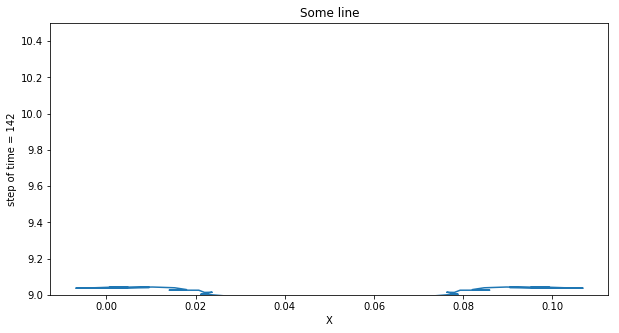

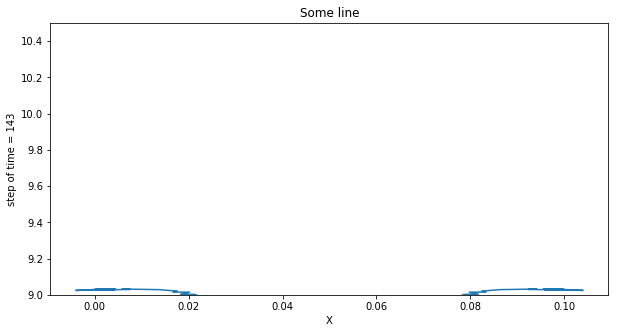

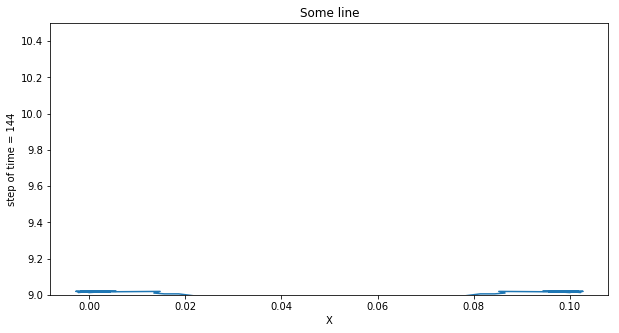

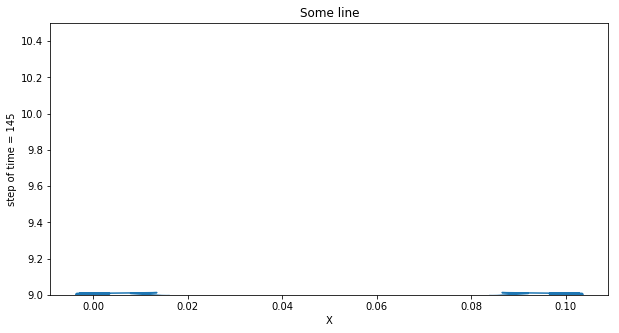

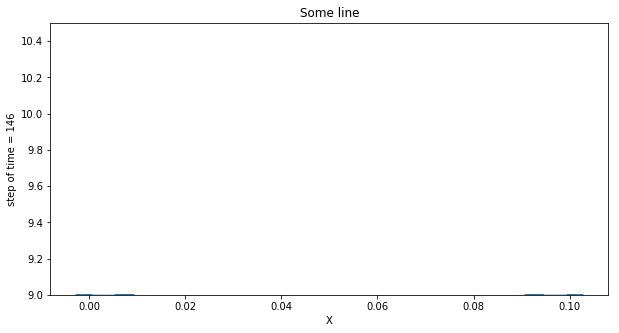

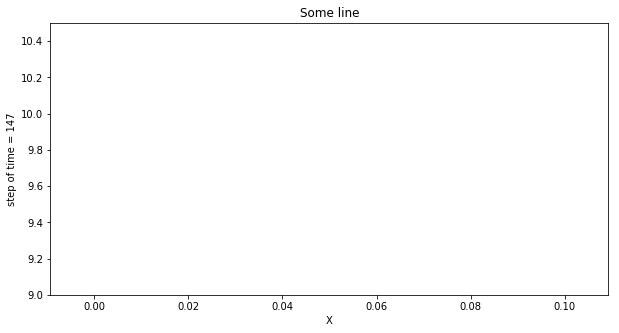

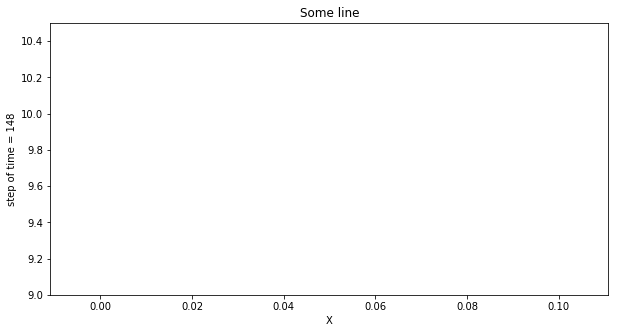

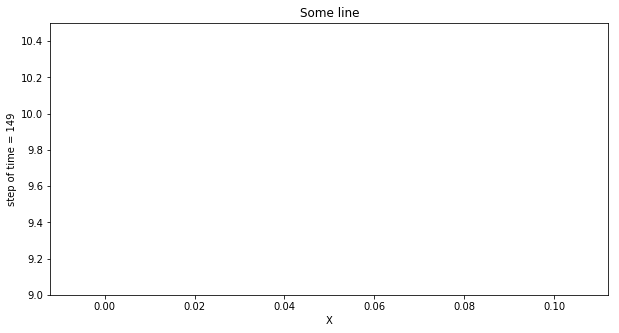

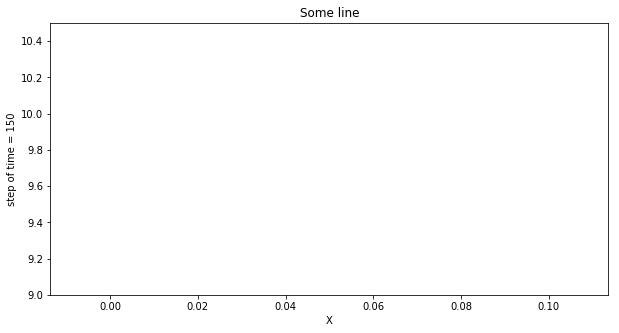

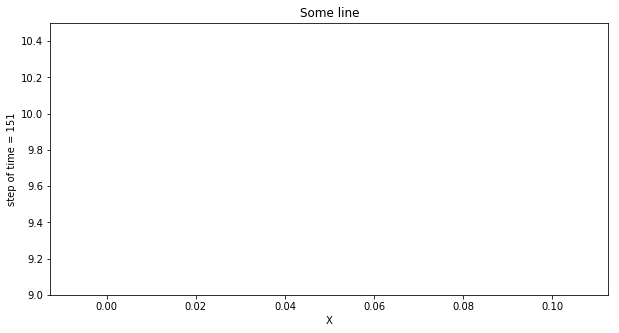

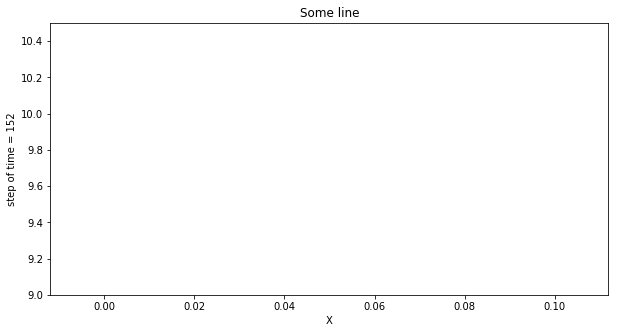

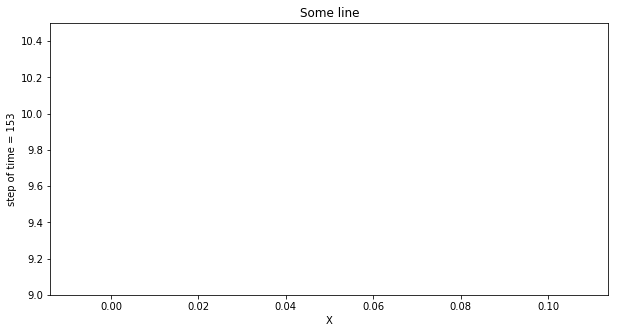

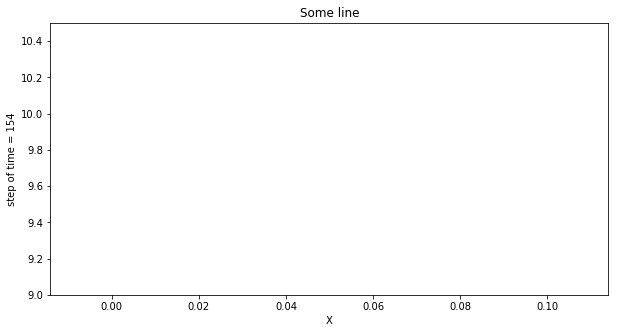

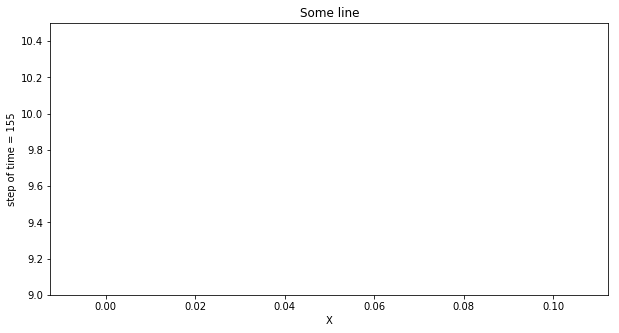

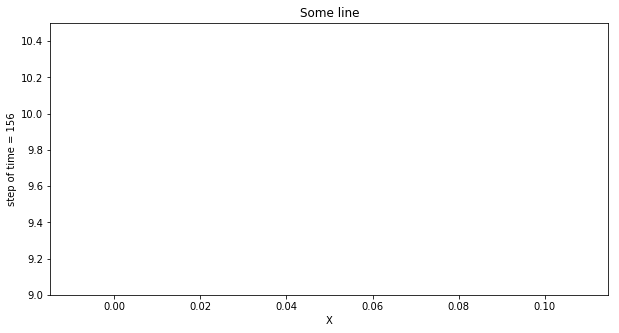

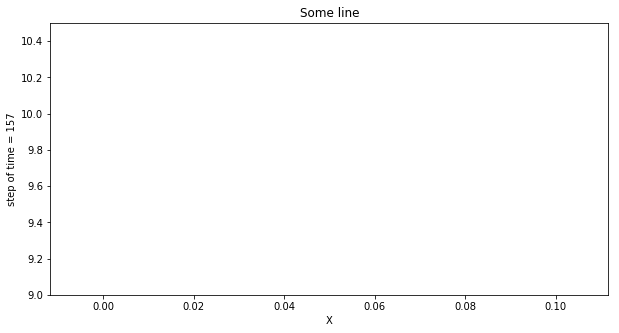

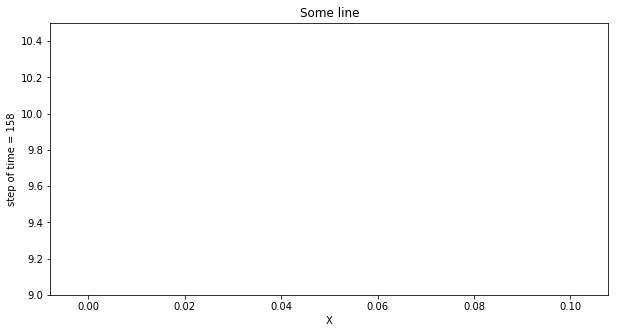

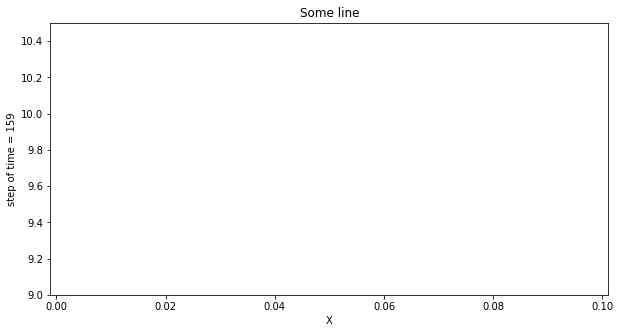

In [69]:
def get_data_for_plotting(step_of_time):
    for pi in range(0, N): # pi - index of point
        F_vec = {'x': 0, 'y': 0}
        Fr_vec, Fl_vec = deepcopy(F_vec), deepcopy(F_vec)
        if pi != N-1:
            lr, pr0 = get_distance(points[pi+1], points[pi]) # расстояния до правого соседа
            er = (lr - l) / l # относительная деформация связи с правым соседом
            Fr = er * E # сила натяжения нити к правому соседу
            Fr_vec = get_f_vec(Fr, lr, pr0)
        if pi != 0:
            ll, pl0 = get_distance(points[pi-1], points[pi]) # расстояния до левого соседа
            el = (ll - l) / l # относительная деформация связи с левым соседом
            Fl = el * E # сила натяжения нити к левому соседу
            Fl_vec = get_f_vec(Fl, ll, pl0)
        if pi == centre_point:
            F_vec = get_f_vec(F, 1, {'x': 0, 'y': -1})
        F_point = sum_vec(Fr_vec, Fl_vec, F_vec)
        if pi == centre_point:
            F_point = F_vec
        a_vec = get_a(F_point, m)
        change_v(pi, a_vec)
    move_points()
    return np.array([p['x'] for p in points]), np.array([p['y'] for p in points])


def plot_for_some_time(step_of_time):
    x, y = get_data_for_plotting(step_of_time)

    fig, ax = plt.subplots(figsize=(10,5))
    ax.plot(x, y)
    #ax.grid()
    ax.set(xlabel='X', ylabel='step of time = {}'.format(step_of_time), title='Some line')
    ax.set_ylim(9, 10.5)

    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    return image

imageio.mimsave('./line5.gif', [plot_for_some_time(i) for i in range(t)], fps=20)